In [1]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

In [4]:
cv2.__version__

'4.5.2'

In [10]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)

In [7]:
aruco_dict

<aruco_Dictionary 000002046FB68230>

<IPython.core.display.Javascript object>


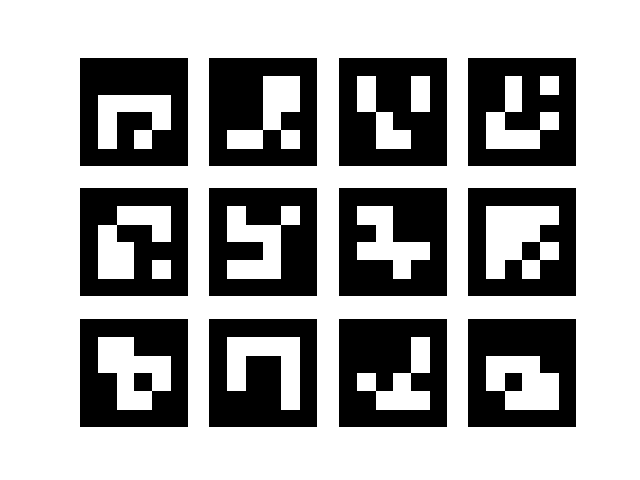

In [11]:
fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny + 1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict, i, 100)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("markers.pdf")
plt.show()